In [57]:
import numpy as np
from numpy.linalg import svd
from scipy.sparse.linalg import svds as svd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
with open('bronco_img.jpg', 'wb') as handle:
    response = requests.get('https://slack-redir.net/link?url=https%3A%2F%2Fmath.boisestate.edu%2F~wright%2Fcourses%2Fm597%2Fbsubronco.bmp',
                             stream=True)
    for block in response.iter_content(1024):
        if not block:
            break
        handle.write(block)

In [115]:
img = 'bronco_img.jpg'

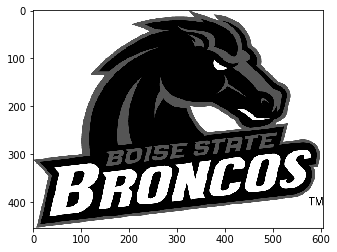

In [116]:
img = mpimg.imread(img)
plt.imshow(img, cmap='gray')

In [39]:
img

array([[240, 240, 240, ..., 240, 240, 240],
       [240, 242, 242, ..., 242, 242, 240],
       [240, 255, 255, ..., 255, 255, 240],
       ...,
       [240, 255, 255, ..., 255, 255, 240],
       [240, 249, 249, ..., 249, 249, 240],
       [240, 240, 240, ..., 240, 240, 240]], dtype=uint8)

In [117]:
rescaled_img = np.asarray(img/255.00)

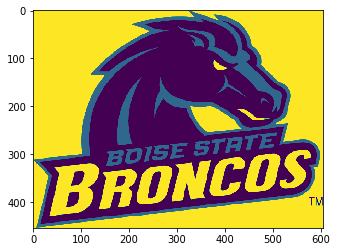

In [59]:
plt.imshow(rescaled_img)

In [47]:
len(rescaled_img)

454

In [48]:
len(rescaled_img[1])

605

In [118]:
def get_P(ratio):
    """
    Returns the p value for the desired ratio
    """
    
    p = 0
    m, n = len(rescaled_img), len(rescaled_img[0])
    ratio = ratio / 100
    p = (ratio * (m*n))//(m+n)
    return int(p)

def plot_images(ratios):
    for ratio in ratios :
        u, sigma, v_T = svd(rescaled_img,
                            k = get_P(ratio),
                            which = 'LM')
        ratio_rescaled_img = np.dot(u, np.dot(np.diag(sigma),v_T))
        title = 'Compressed image at ratio ' + str(ratio)
        _ = plt.title(title)
        _ = plt.imshow(ratio_rescaled_img, cmap='gray')
        image_name = 'images/ratio_'+str(ratio)
        plt.savefig(image_name)
        plt.show()

In [71]:
u, sigma, v_T = svd(rescaled_img,
                    k = get_P(1),
                    which = 'LM')

In [131]:
np.diag(sigma)[2][2]

80.30847528282959

In [78]:
ratio1_rescaled_img = np.dot(u, np.dot(np.diag(sigma),v_T))

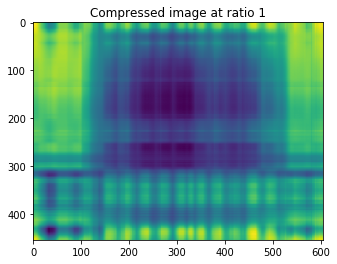

In [80]:
_ = plt.title('Compressed image at ratio 1')
plt.imshow(ratio1_rescaled_img)

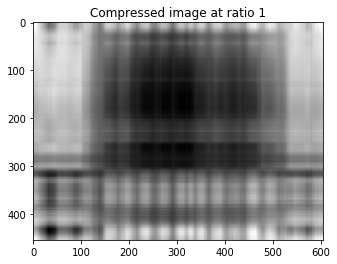

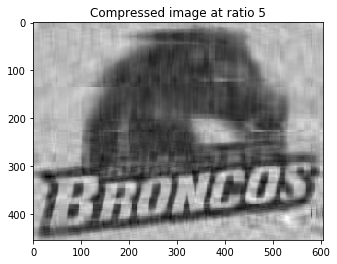

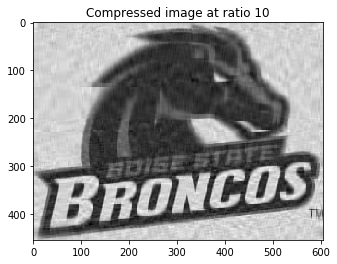

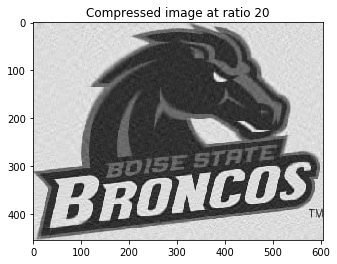

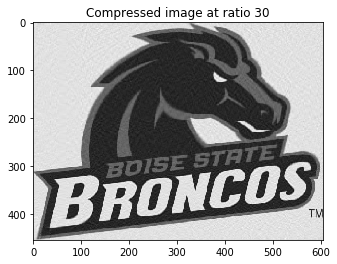

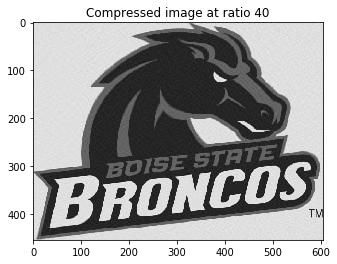

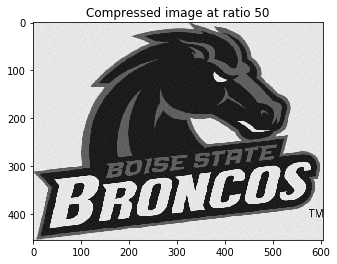

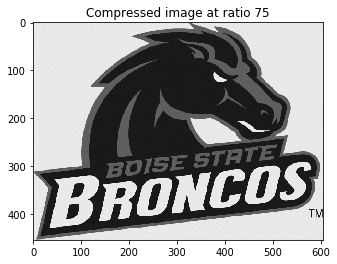

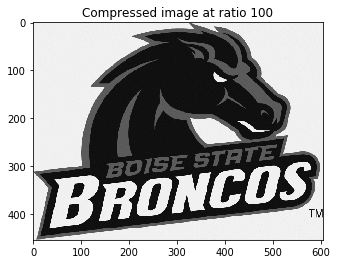

In [119]:
plot_images([1,5,10,20,30,40,50,75,100])

In [98]:
get_P(30)

77

In [99]:
get_P(90)

233

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


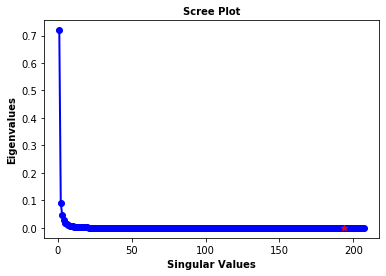

In [145]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size' : 10}
num_vars = get_P(80)
u, sigma, v_T = svd(rescaled_img,
                    k = get_P(80),
                    which = 'LM')
sigma = sigma[::-1]
eigen_values = sigma ** 2 / np.sum(sigma ** 2)
#fig = plt.figure(figsize=(20,10), dpi=200)
sing_vals = np.arange(len(sigma)) + 1
_ = plt.plot(sing_vals, eigen_values, 'bo-', linewidth = 2,)
plt.plot(sing_vals[193],eigen_values[193], 'r*')
plt.xlabel('Singular Values', **font)
plt.ylabel('Eigenvalues', **font)
plt.title('Scree Plot', **font)
plt.savefig('images/scree.png')

In [121]:
get_P(75)

194